In [82]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
from sklearn.datasets import make_blobs

In [84]:
X,y = make_blobs(centers = 2,center_box = (-4,4))

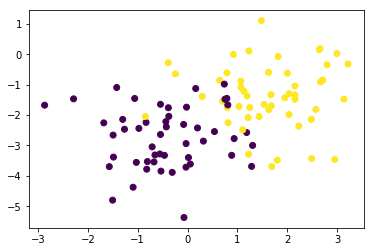

In [85]:
plt.scatter(X[:,0], X[:,1], c = y)

In [103]:
class LogisticRegression:
    
    def __init__(self, tolerance = 1e-2, max_epoch = 1000):
        
        self.tolerance = tolerance
        self.max_epoch = max_epoch
        self.history = []
        
    def cost(self, X,y,weights):
        return np.sum(-1/len(y)*(y*np.log(self.sigmoid(X.dot(weights.reshape(X.shape[1],-1)))) + 
                         (1-y)*np.log(1-self.sigmoid(X.dot(weights.reshape(X.shape[1],-1))))))
    
    def gradient(self, X,y,weights):
        return 1/len(y)*(X.T.dot(self.sigmoid(X.dot(weights.reshape(X.shape[1],-1))) - y)).reshape(-1)
    
    def sigmoid(self, X):
        return 1/(1 + np.exp(-X))
        
    def fit(self,X,y):
        ones = np.array([1]*len(X)).reshape(len(X),-1)
        self.X = np.concatenate([ones,X],axis = 1)
        self.y = y.reshape(len(X),-1)
        self.weights = np.random.randn(self.X.shape[1])
        step_sizes = np.logspace(1,1e-10,12)
        
        weights_magnitude = np.sqrt(np.sum(self.weights**2))
        previous_iter_weights_magnitude = np.Inf
        count = 0
        self.history.append(self.weights)

        while abs(previous_iter_weights_magnitude - weights_magnitude) > self.tolerance and count < self.max_epoch:
            
            previous_iter_weights_magnitude = weights_magnitude.copy()
            count += 1
            gradient = self.gradient(self.X, self.y, self.weights)
            print('cost is {}'.format(self.cost(self.X, self.y, self.weights)))
            
            tmp_weights = []
            tmp_costs = []
            
            for step in step_sizes:
                new_weight = self.weights - self.gradient(self.X,self.y,self.weights)*step
                tmp_weights.append(new_weight)
                tmp_costs.append(self.cost(self.X,self.y,new_weight))
            
            self.weights = tmp_weights[tmp_costs.index(min(tmp_costs))]
            self.history.append(self.weights)
            weights_magnitude = np.sqrt(np.sum(self.weights**2))
            
    def predict(self,X):
        
        ones = np.array([1]*len(X)).reshape(len(X),-1)
        X = np.concatenate([ones,X],axis = 1)
        
        return (self.sigmoid(X.dot(self.weights.reshape(X.shape[1],-1)))>=0.5).reshape(-1)

In [104]:
testLogisticReg = LogisticRegression()

In [105]:
testLogisticReg.fit(X,y)

cost is 0.5933831476240399
cost is 0.3642953776616017
cost is 0.2745660545944817
cost is 0.23743325381752034
cost is 0.2359011786735079
cost is 0.2347244919557149
cost is 0.23378658684238213
cost is 0.23301583584964408
cost is 0.23237608500277604
cost is 0.231836271284438
cost is 0.2313797659490323
cost is 0.23098970548284328
cost is 0.23064611237661387
cost is 0.23034515406827913
cost is 0.23008710869147025
cost is 0.22985681093124888
cost is 0.22965133411682195
cost is 0.2294731086761471
cost is 0.22930721019200703
cost is 0.2291644657001854
cost is 0.22903010821241823
cost is 0.22889869745163693
cost is 0.22877327389002325


In [106]:
preds = testLogisticReg.predict(X)

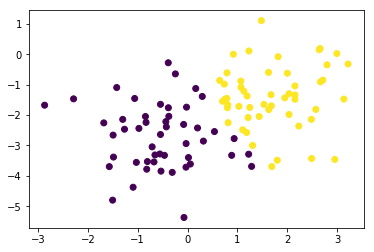

In [107]:
plt.scatter(X[:,0],X[:,1], c = preds)

In [108]:
np.mean(y == preds) # accuracy

0.89000000000000001

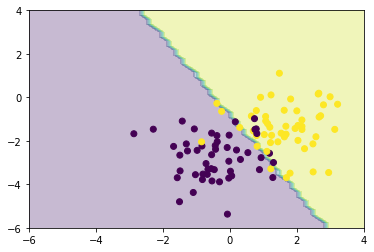

In [109]:
vector_space = np.meshgrid(np.linspace(-6,4), np.linspace(-6,4))
predictions = testLogisticReg.predict(np.c_[vector_space[0].ravel(), vector_space[1].ravel()])
predictions = np.array(predictions).reshape(vector_space[0].shape)
plt.contourf(vector_space[0],vector_space[1], predictions,alpha = 0.3)
plt.scatter(X[:,0],X[:,1], c = y)